In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import interp1d
from scipy.ndimage import gaussian_filter
import pickle
from scipy.signal import convolve


# load ACM simulations

In [2]:
# load simulations 

speeds = [0.27,0.81,1.62,3.24,0.1,0.2,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
#speeds = [0.1,0.2,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

data = []
cell = 300
for s in speeds: 
    print(s)
    fp = f'/user/sebert/home/Documents/Simulations/motion/anticipation_1D/ACM/ACM_slow/w_GC/w_GC_0.0/smooth_{s}'
    with open(f'{fp}/out', 'rb') as handle:
        out = pickle.load(handle)    
        
    with open(f'{fp}/params', 'rb') as handle:
        params = pickle.load(handle)

    duration = params['duration']
    dt = params['dt']
    #time = (np.arange(0,duration,dt)- params['tps_rf_GC_mid'][50])*1000
    time = (np.arange(0,duration,dt) - (params['spacing']*cell)/params['speed'])*1000#+45

    data.append([time,out['RG'][cell]])

    if s == 0.81:
        outd = out




0.27
0.81
1.62
3.24
0.1
0.2
0.4
0.5
0.6
0.7
0.8
0.9
1.0


# load RAM simulations

In [3]:
data3 = []
cell = 150

for s in speeds: 
    print(s)
    fp = f'/user/sebert/home/Documents/Simulations/motion/anticipation_1D/Reciporcal/Reciporcal_fitted/wBA/wBA_31.0/smooth_{s}'
    with open(f'{fp}/out', 'rb') as handle:
        out = pickle.load(handle)    
        
    with open(f'{fp}/params', 'rb') as handle:
        paramsi = pickle.load(handle)

    duration = paramsi['duration']
    dt = paramsi['dt']
    #time = (np.arange(0,duration,dt)- params['tps_rf_GC_mid'][50])*1000
    time = (np.arange(0,duration,dt) - (paramsi['spacing']*cell)/paramsi['speed'])*1000#+45
    data3.append([time,out['RG'][:]])

    if s == 0.81:
        outd3 = out


0.27


0.81
1.62
3.24
0.1
0.2
0.4
0.5
0.6
0.7
0.8
0.9
1.0


# load RAM simulations linear

In [4]:
data4 = []
cell = 150

for s in speeds: 
    print(s)
    fp = f'/user/sebert/home/Documents/Simulations/motion/anticipation_1D/Reciporcal/Reciporcal_fitted_linear/wBA/wBA_31.0/smooth_{s}'
    with open(f'{fp}/out', 'rb') as handle:
        out = pickle.load(handle)    
        
    with open(f'{fp}/params', 'rb') as handle:
        paramsi = pickle.load(handle)

    duration = paramsi['duration']
    dt = paramsi['dt']
    #time = (np.arange(0,duration,dt)- params['tps_rf_GC_mid'][50])*1000
    time = (np.arange(0,duration,dt) - (paramsi['spacing']*cell)/paramsi['speed'])*1000#+45
    data4.append([time,out['RG'][:]])

    if s == 0.81:
        outd4 = out

0.27
0.81
1.62
3.24
0.1
0.2
0.4
0.5
0.6
0.7
0.8
0.9
1.0


# load monophasic RAM linear simulations

In [11]:
data5 = []
cell = 300

for s in speeds: 
    print(s)
    fp = f'/user/sebert/home/Documents/Simulations/motion/anticipation_1D/Reciporcal/Reciporcal_mono_linear/wBA/wBA_31.0/smooth_{s}'
    with open(f'{fp}/out', 'rb') as handle:
        out = pickle.load(handle)    
        
    with open(f'{fp}/params', 'rb') as handle:
        paramsi = pickle.load(handle)

    duration = paramsi['duration']
    dt = paramsi['dt']
    #time = (np.arange(0,duration,dt)- params['tps_rf_GC_mid'][50])*1000
    time = (np.arange(0,duration,dt) - (paramsi['spacing']*cell)/paramsi['speed'])*1000#+45
    data5.append([time,out['RG'][:]])

    if s == 0.81:
        outd5 = out

0.27
0.81
1.62
3.24
0.1
0.2
0.4
0.5
0.6
0.7
0.8
0.9
1.0


# load monophai RAM linear fitted simulation

In [9]:
data6 = []
cell = 300

for s in speeds: 
    print(s)
    fp = f'/user/sebert/home/Documents/Simulations/motion/anticipation_1D/Reciporcal/Reciporcal_mono_linear/wBA/wBA_9.0/smooth_{s}'
    with open(f'{fp}/out', 'rb') as handle:
        out = pickle.load(handle)    
        
    with open(f'{fp}/params', 'rb') as handle:
        paramsi = pickle.load(handle)

    duration = paramsi['duration']
    dt = paramsi['dt']
    #time = (np.arange(0,duration,dt)- params['tps_rf_GC_mid'][50])*1000
    time = (np.arange(0,duration,dt) - (paramsi['spacing']*cell)/paramsi['speed'])*1000#+45
    data6.append([time,out['RG'][:]])

    if s == 0.81:
        outd6 = out

0.27


FileNotFoundError: [Errno 2] No such file or directory: '/user/sebert/home/Documents/Simulations/motion/anticipation_1D/Reciporcal/Reciporcal_fitted_mono_linear/wBA/wBA_9.0/smooth_0.27/out'

# compare GC firing rates for different speeds ACM and RAM

(-1000.0, 1000.0)

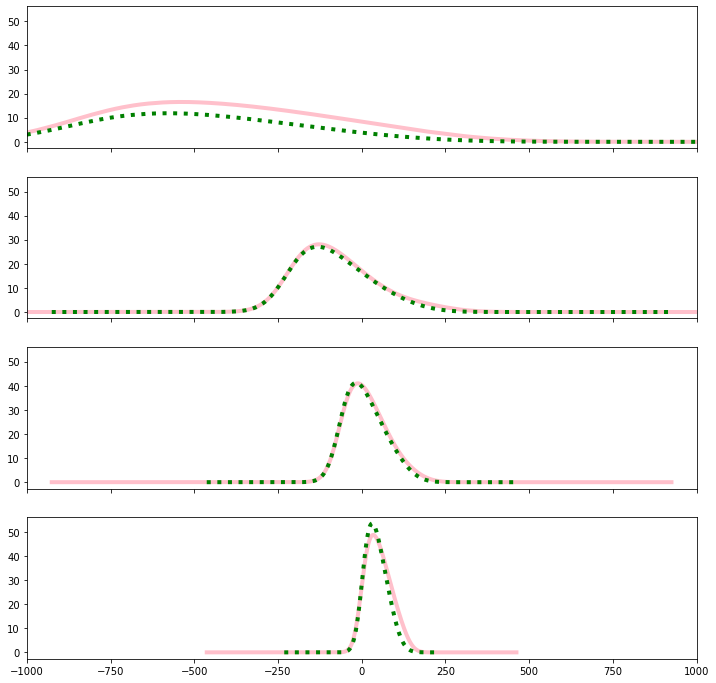

In [10]:
# ACM and RAM
fig, ax = plt.subplots(4,1, sharex = True, sharey = True, figsize = (12,12))


ax[0].plot(data[0][0],data[0][1], color = 'pink', linewidth = 4, label = 'ACM reproduction')
ax[1].plot(data[1][0],data[1][1], color = 'pink', linewidth = 4, label = 'ACM reproduction')
ax[2].plot(data[2][0],data[2][1], color = 'pink', linewidth = 4, label = 'ACM reproduction')
ax[3].plot(data[3][0],data[3][1], color = 'pink', linewidth = 4, label = 'ACM reproduction')

ax[0].plot(data3[0][0],data3[0][1], color = 'green', linewidth = 4, label = 'RAM', linestyle = ':')
ax[1].plot(data3[1][0],data3[1][1], color = 'green', linewidth = 4, label = 'RAM', linestyle = ':')
ax[2].plot(data3[2][0],data3[2][1], color = 'green', linewidth = 4, label = 'RAM', linestyle = ':')
ax[3].plot(data3[3][0],data3[3][1], color = 'green', linewidth = 4, label = 'RAM', linestyle = ':')


ax[0].set_xlim(-1000,1000)

# compare ACM and RAM in detail, same mechanism 

In [14]:
# load simulations without mechanism

cell = 300
s = 0.81
fp = f'/user/sebert/home/Documents/Simulations/motion/anticipation_1D/ACM/Pooling_slow/w_GC/w_GC_0.0/smooth_{s}'
with open(f'{fp}/out', 'rb') as handle:
    outdp = pickle.load(handle)    
    
with open(f'{fp}/params', 'rb') as handle:
    params = pickle.load(handle)

duration = params['duration']
dt = params['dt']
time = (np.arange(0,duration,dt) - (params['spacing']*cell)/params['speed'])*1000#+45

fp = f'/user/sebert/home/Documents/Simulations/motion/anticipation_1D/Reciporcal/Reciporcal_fitted/wBA/wBA_0.0/smooth_{s}'
with open(f'{fp}/out', 'rb') as handle:
    outdp3 = pickle.load(handle)   


fp = f'/user/sebert/home/Documents/Simulations/motion/anticipation_1D/Reciporcal/Reciporcal_fitted_linear/wBA/wBA_0.0/smooth_{s}'
with open(f'{fp}/out', 'rb') as handle:
    outdp4 = pickle.load(handle)   

fp = f'/user/sebert/home/Documents/Simulations/motion/anticipation_1D/Reciporcal/Reciporcal_fitted_mono_linear/wBA/wBA_0.0/smooth_{s}'
with open(f'{fp}/out', 'rb') as handle:
    outdp5 = pickle.load(handle)   



FileNotFoundError: [Errno 2] No such file or directory: '/user/sebert/home/Documents/Simulations/motion/anticipation_1D/Reciporcal/Reciporcal_mono_linear/wBA/wBA_0.0/smooth_0.81/out'

(-500.0, 500.0)

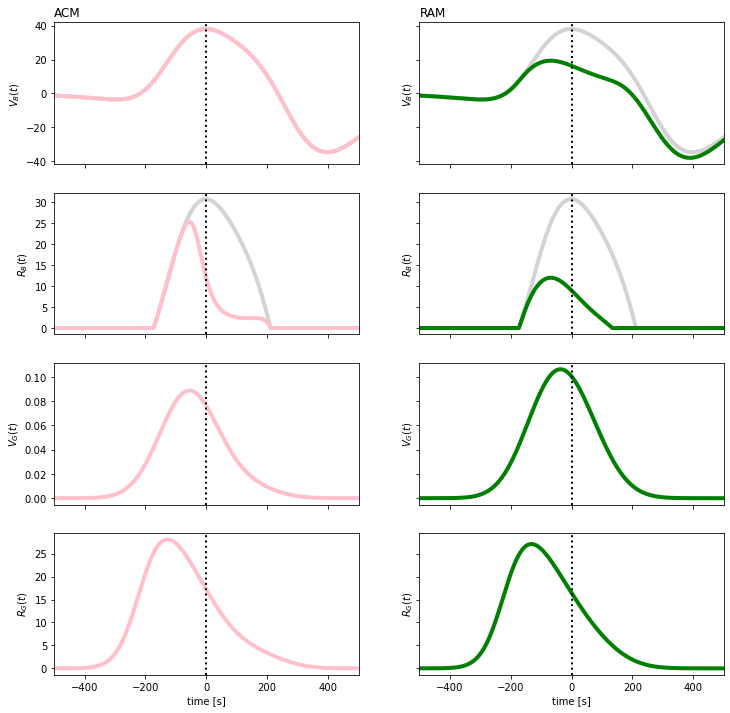

In [9]:

lw = 4
c1 = 'pink'
c2 = 'green'


fig,ax = plt.subplots(4,2,  figsize = (12,12), sharex = 'col', sharey = 'row')

ax[0,0].set_title('ACM', loc = 'left')
ax[0,0].set_title('ACM', loc = 'left')
ax[0,0].set_title('ACM', loc = 'left')
ax[0,0].set_title('ACM', loc = 'left')

ax[0,0].set_ylabel('$V_{B}(t)$')
ax[0,0].plot(data[1][0],outdp['VB'][300,:], color = 'lightgrey', linewidth = lw)
ax[0,0].plot(data[1][0],outd['VB'][300,:], color = c1, linewidth = lw)

ax[1,0].set_ylabel('$R_{B}(t)$')
ax[1,0].plot(data[1][0],outdp['RB'][300,:], color = 'lightgrey', linewidth = lw)
ax[1,0].plot(data[1][0], outd['RB'][300,:], color = c1, linewidth = lw)

#ax[2,0].plot(data[1][0],outd['RB'][300,:]- outdp['RB'][300,:], color = 'green', linestyle = ':')

ax[2,0].set_ylabel('$V_{G}(t)$')
#ax[2,0].plot(data[1][0],outdp['VG'][300,:], color = 'grey')
ax[2,0].plot(data[1][0], outd['VG'][300,:], color = c1, linewidth = lw)

ax[3,0].set_ylabel('$R_{G}(t)$')
#ax[3,0].plot(data[1][0],outdp['RG'][300,:], color = 'grey')
ax[3,0].plot(data[1][0], outd['RG'][300,:], color = c1, linewidth = lw)



ax[0,1].set_title('RAM', loc = 'left')

ax[0,1].set_ylabel('$V_{B}(t)$')
ax[0,1].plot(data3[1][0],outdp3['VB'][50,:], color = 'lightgrey', linewidth = lw)
ax[0,1].plot(data3[1][0],outd3['VB'][50,:], color = c2, linewidth = lw)

ax[1,1].set_ylabel('$R_{B}(t)$')
ax[1,1].plot(data3[1][0],outdp3['RB'][50,:], color = 'lightgrey', linewidth = lw)
ax[1,1].plot(data3[1][0], outd3['RB'][50,:], color = c2, linewidth = lw)

#ax[2,1].plot(data[1][0],outd3['RB'][300,:]- outdp3['RB'][300,:], color = 'cyan', linestyle = ':')

ax[2,1].set_ylabel('$V_{G}(t)$')
#ax[2,1].plot(data[1][0],outdp3['VG'][300,:], color = 'grey')
ax[2,1].plot(data3[1][0],outd3['VG'][:], color = c2, linewidth = lw)

ax[3,1].set_ylabel('$R_{G}(t)$')
#ax[3,1].plot(data[1][0],outdp3['RG'][300,:], color = 'grey')
ax[3,1].plot(data3[1][0], outd3['RG'][:], color = c2, linewidth = lw)


ax[0,1].axvline(0,linestyle = ':', color = 'k', linewidth =2 )
ax[1,1].axvline(0,linestyle = ':', color = 'k', linewidth =2 )
ax[2,1].axvline(0,linestyle = ':', color = 'k', linewidth =2 )
ax[3,1].axvline(0,linestyle = ':', color = 'k', linewidth =2 )


ax[0,0].axvline(0,linestyle = ':', color = 'k', linewidth =2 )
ax[1,0].axvline(0,linestyle = ':', color = 'k', linewidth =2 )
ax[2,0].axvline(0,linestyle = ':', color = 'k', linewidth =2 )
ax[3,0].axvline(0,linestyle = ':', color = 'k', linewidth =2 )


ax[-1,0].set_xlabel ('time [s]')
ax[-1,1].set_xlabel ('time [s]')
ax[-1,0].set_xlim(-500,500)
ax[-1,1].set_xlim(-500,500)

# compare ACM to linear version of the RAM model

(-1000.0, 1000.0)

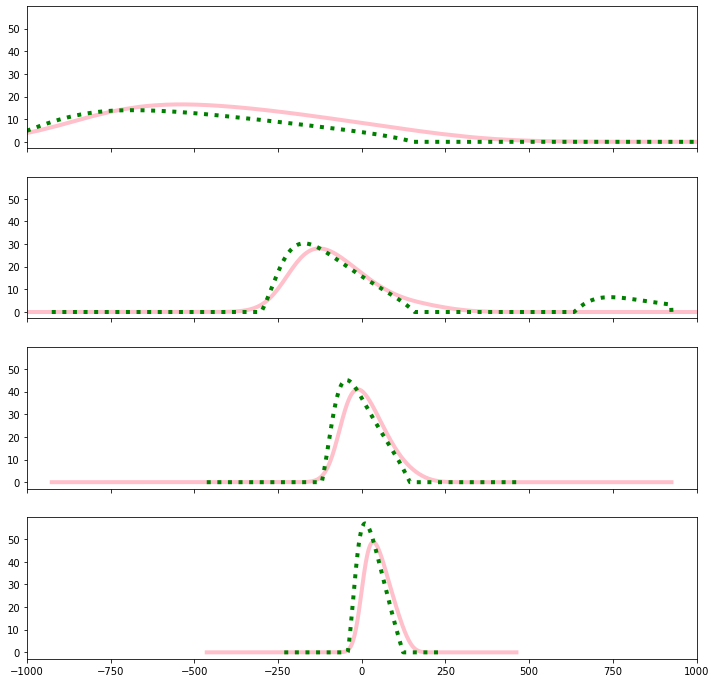

In [10]:
# ACM and RAM
fig, ax = plt.subplots(4,1, sharex = True, sharey = True, figsize = (12,12))


ax[0].plot(data[0][0],data[0][1], color = 'pink', linewidth = 4, label = 'ACM reproduction')
ax[1].plot(data[1][0],data[1][1], color = 'pink', linewidth = 4, label = 'ACM reproduction')
ax[2].plot(data[2][0],data[2][1], color = 'pink', linewidth = 4, label = 'ACM reproduction')
ax[3].plot(data[3][0],data[3][1], color = 'pink', linewidth = 4, label = 'ACM reproduction')

ax[0].plot(data4[0][0],data4[0][1], color = 'green', linewidth = 4, label = 'RAM', linestyle = ':')
ax[1].plot(data4[1][0],data4[1][1], color = 'green', linewidth = 4, label = 'RAM', linestyle = ':')
ax[2].plot(data4[2][0],data4[2][1], color = 'green', linewidth = 4, label = 'RAM', linestyle = ':')
ax[3].plot(data4[3][0],data4[3][1], color = 'green', linewidth = 4, label = 'RAM', linestyle = ':')


ax[0].set_xlim(-1000,1000)

(-500.0, 500.0)

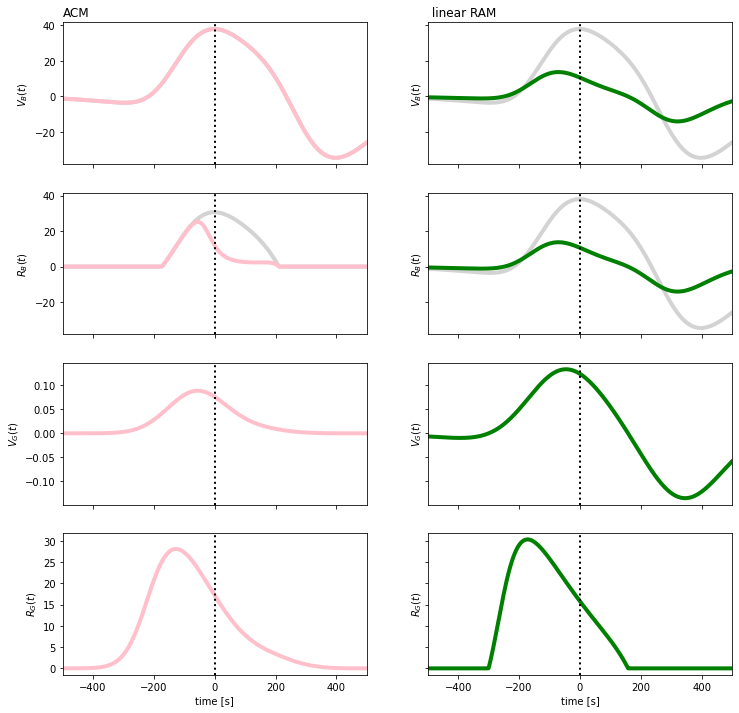

In [11]:

lw = 4
c1 = 'pink'
c2 = 'green'


fig,ax = plt.subplots(4,2,  figsize = (12,12), sharex = 'col', sharey = 'row')

ax[0,0].set_title('ACM', loc = 'left')
ax[0,0].set_title('ACM', loc = 'left')
ax[0,0].set_title('ACM', loc = 'left')
ax[0,0].set_title('ACM', loc = 'left')

ax[0,0].set_ylabel('$V_{B}(t)$')
ax[0,0].plot(data[1][0],outdp['VB'][300,:], color = 'lightgrey', linewidth = lw)
ax[0,0].plot(data[1][0],outd['VB'][300,:], color = c1, linewidth = lw)

ax[1,0].set_ylabel('$R_{B}(t)$')
ax[1,0].plot(data[1][0],outdp['RB'][300,:], color = 'lightgrey', linewidth = lw)
ax[1,0].plot(data[1][0], outd['RB'][300,:], color = c1, linewidth = lw)

#ax[2,0].plot(data[1][0],outd['RB'][300,:]- outdp['RB'][300,:], color = 'green', linestyle = ':')

ax[2,0].set_ylabel('$V_{G}(t)$')
#ax[2,0].plot(data[1][0],outdp['VG'][300,:], color = 'grey')
ax[2,0].plot(data[1][0], outd['VG'][300,:], color = c1, linewidth = lw)

ax[3,0].set_ylabel('$R_{G}(t)$')
#ax[3,0].plot(data[1][0],outdp['RG'][300,:], color = 'grey')
ax[3,0].plot(data[1][0], outd['RG'][300,:], color = c1, linewidth = lw)



ax[0,1].set_title(' linear RAM', loc = 'left')

ax[0,1].set_ylabel('$V_{B}(t)$')
ax[0,1].plot(data4[1][0],outdp4['VB'][50,:], color = 'lightgrey', linewidth = lw)
ax[0,1].plot(data4[1][0],outd4['VB'][50,:], color = c2, linewidth = lw)

ax[1,1].set_ylabel('$R_{B}(t)$')
ax[1,1].plot(data4[1][0],outdp4['RB'][50,:], color = 'lightgrey', linewidth = lw)
ax[1,1].plot(data4[1][0], outd4['RB'][50,:], color = c2, linewidth = lw)

#ax[2,1].plot(data[1][0],outd3['RB'][300,:]- outdp3['RB'][300,:], color = 'cyan', linestyle = ':')

ax[2,1].set_ylabel('$V_{G}(t)$')
#ax[2,1].plot(data[1][0],outdp3['VG'][300,:], color = 'grey')
ax[2,1].plot(data4[1][0],outd4['VG'][:], color = c2, linewidth = lw)

ax[3,1].set_ylabel('$R_{G}(t)$')
#ax[3,1].plot(data[1][0],outdp3['RG'][300,:], color = 'grey')
ax[3,1].plot(data4[1][0], outd4['RG'][:], color = c2, linewidth = lw)


ax[0,1].axvline(0,linestyle = ':', color = 'k', linewidth =2 )
ax[1,1].axvline(0,linestyle = ':', color = 'k', linewidth =2 )
ax[2,1].axvline(0,linestyle = ':', color = 'k', linewidth =2 )
ax[3,1].axvline(0,linestyle = ':', color = 'k', linewidth =2 )


ax[0,0].axvline(0,linestyle = ':', color = 'k', linewidth =2 )
ax[1,0].axvline(0,linestyle = ':', color = 'k', linewidth =2 )
ax[2,0].axvline(0,linestyle = ':', color = 'k', linewidth =2 )
ax[3,0].axvline(0,linestyle = ':', color = 'k', linewidth =2 )


ax[-1,0].set_xlabel ('time [s]')
ax[-1,1].set_xlabel ('time [s]')
ax[-1,0].set_xlim(-500,500)
ax[-1,1].set_xlim(-500,500)

# same for linear monophasic model

(-1000.0, 1000.0)

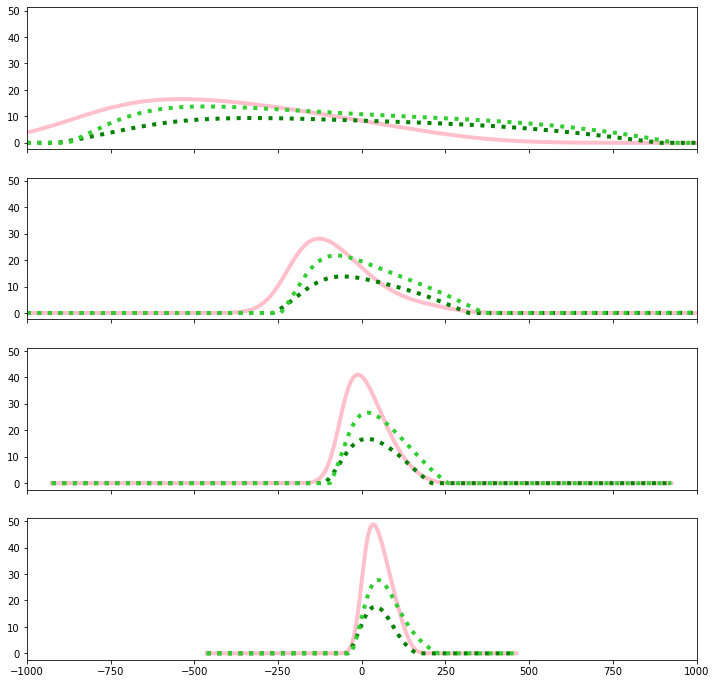

In [12]:
# ACM and RAM
fig, ax = plt.subplots(4,1, sharex = True, sharey = True, figsize = (12,12))


ax[0].plot(data[0][0],data[0][1], color = 'pink', linewidth = 4, label = 'ACM reproduction')
ax[1].plot(data[1][0],data[1][1], color = 'pink', linewidth = 4, label = 'ACM reproduction')
ax[2].plot(data[2][0],data[2][1], color = 'pink', linewidth = 4, label = 'ACM reproduction')
ax[3].plot(data[3][0],data[3][1], color = 'pink', linewidth = 4, label = 'ACM reproduction')

ax[0].plot(data5[0][0],data5[0][1], color = 'green', linewidth = 4, label = 'RAM', linestyle = ':')
ax[1].plot(data5[1][0],data5[1][1], color = 'green', linewidth = 4, label = 'RAM', linestyle = ':')
ax[2].plot(data5[2][0],data5[2][1], color = 'green', linewidth = 4, label = 'RAM', linestyle = ':')
ax[3].plot(data5[3][0],data5[3][1], color = 'green', linewidth = 4, label = 'RAM', linestyle = ':')


ax[0].plot(data6[0][0],data6[0][1], color = 'limegreen', linewidth = 4, label = 'RAM', linestyle = ':')
ax[1].plot(data6[1][0],data6[1][1], color = 'limegreen', linewidth = 4, label = 'RAM', linestyle = ':')
ax[2].plot(data6[2][0],data6[2][1], color = 'limegreen', linewidth = 4, label = 'RAM', linestyle = ':')
ax[3].plot(data6[3][0],data6[3][1], color = 'limegreen', linewidth = 4, label = 'RAM', linestyle = ':')


ax[0].set_xlim(-1000,1000)

(-500.0, 500.0)

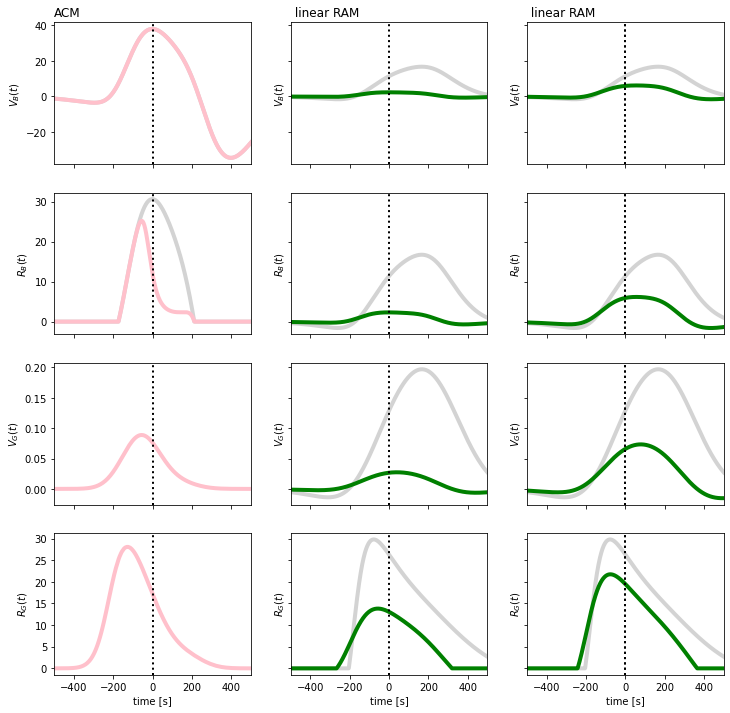

In [15]:
lw = 4
c1 = 'pink'
c2 = 'green'


fig,ax = plt.subplots(4,3,  figsize = (12,12), sharex = 'col', sharey = 'row')

ax[0,0].set_title('ACM', loc = 'left')
ax[0,0].set_title('ACM', loc = 'left')
ax[0,0].set_title('ACM', loc = 'left')
ax[0,0].set_title('ACM', loc = 'left')

ax[0,0].set_ylabel('$V_{B}(t)$')
ax[0,0].plot(data[1][0],outdp['VB'][300,:], color = 'lightgrey', linewidth = lw)
ax[0,0].plot(data[1][0],outd['VB'][300,:], color = c1, linewidth = lw)

ax[1,0].set_ylabel('$R_{B}(t)$')
ax[1,0].plot(data[1][0],outdp['RB'][300,:], color = 'lightgrey', linewidth = lw)
ax[1,0].plot(data[1][0], outd['RB'][300,:], color = c1, linewidth = lw)

#ax[2,0].plot(data[1][0],outd['RB'][300,:]- outdp['RB'][300,:], color = 'green', linestyle = ':')

ax[2,0].set_ylabel('$V_{G}(t)$')
#ax[2,0].plot(data[1][0],outdp['VG'][300,:], color = 'grey')
ax[2,0].plot(data[1][0], outd['VG'][300,:], color = c1, linewidth = lw)

ax[3,0].set_ylabel('$R_{G}(t)$')
#ax[3,0].plot(data[1][0],outdp['RG'][300,:], color = 'grey')
ax[3,0].plot(data[1][0], outd['RG'][300,:], color = c1, linewidth = lw)



ax[0,1].set_title(' linear monophasic RAM', loc = 'left')

ax[0,1].set_ylabel('$V_{B}(t)$')
ax[0,1].plot(data5[1][0],outdp5['VB'][50,:], color = 'lightgrey', linewidth = lw)
ax[0,1].plot(data5[1][0],outd5['VB'][50,:], color = c2, linewidth = lw)

ax[1,1].set_ylabel('$R_{B}(t)$')
ax[1,1].plot(data5[1][0],outdp5['RB'][50,:], color = 'lightgrey', linewidth = lw)
ax[1,1].plot(data5[1][0], outd5['RB'][50,:], color = c2, linewidth = lw)

#ax[2,1].plot(data[1][0],outd3['RB'][300,:]- outdp3['RB'][300,:], color = 'cyan', linestyle = ':')

ax[2,1].set_ylabel('$V_{G}(t)$')
ax[2,1].plot(data5[1][0],outdp5['VG'][:], color = 'lightgrey', linewidth = lw)
ax[2,1].plot(data5[1][0],outd5['VG'][:], color = c2, linewidth = lw)

ax[3,1].set_ylabel('$R_{G}(t)$')
ax[3,1].plot(data5[1][0],outdp5['RG'][:], color = 'lightgrey', linewidth = lw)
ax[3,1].plot(data5[1][0], outd5['RG'][:], color = c2, linewidth = lw)


ax[0,1].axvline(0,linestyle = ':', color = 'k', linewidth =2 )
ax[1,1].axvline(0,linestyle = ':', color = 'k', linewidth =2 )
ax[2,1].axvline(0,linestyle = ':', color = 'k', linewidth =2 )
ax[3,1].axvline(0,linestyle = ':', color = 'k', linewidth =2 )


ax[0,0].axvline(0,linestyle = ':', color = 'k', linewidth =2 )
ax[1,0].axvline(0,linestyle = ':', color = 'k', linewidth =2 )
ax[2,0].axvline(0,linestyle = ':', color = 'k', linewidth =2 )
ax[3,0].axvline(0,linestyle = ':', color = 'k', linewidth =2 )


ax[-1,0].set_xlabel ('time [s]')
ax[-1,1].set_xlabel ('time [s]')
ax[-1,0].set_xlim(-500,500)
ax[-1,1].set_xlim(-500,500)







ax[0,2].set_title(' linear monophaisc RAM, params refitted', loc = 'left')

ax[0,2].set_ylabel('$V_{B}(t)$')
ax[0,2].plot(data6[1][0],outdp5['VB'][50,:], color = 'lightgrey', linewidth = lw)
ax[0,2].plot(data6[1][0],outd6['VB'][50,:], color = c2, linewidth = lw)

ax[1,2].set_ylabel('$R_{B}(t)$')
ax[1,2].plot(data6[1][0],outdp5['RB'][50,:], color = 'lightgrey', linewidth = lw)
ax[1,2].plot(data6[1][0], outd6['RB'][50,:], color = c2, linewidth = lw)

#ax[2,1].plot(data[1][0],outd3['RB'][300,:]- outdp3['RB'][300,:], color = 'cyan', linestyle = ':')

ax[2,2].set_ylabel('$V_{G}(t)$')
ax[2,2].plot(data6[1][0],outdp5['VG'][:], color = 'lightgrey', linewidth = lw)
ax[2,2].plot(data6[1][0],outd6['VG'][:], color = c2, linewidth = lw)

ax[3,2].set_ylabel('$R_{G}(t)$')
ax[3,2].plot(data6[1][0],outdp5['RG'][:], color = 'lightgrey', linewidth = lw)
ax[3,2].plot(data6[1][0], outd6['RG'][:], color = c2, linewidth = lw)


ax[0,2].axvline(0,linestyle = ':', color = 'k', linewidth =2 )
ax[1,2].axvline(0,linestyle = ':', color = 'k', linewidth =2 )
ax[2,2].axvline(0,linestyle = ':', color = 'k', linewidth =2 )
ax[3,2].axvline(0,linestyle = ':', color = 'k', linewidth =2 )


ax[0,2].axvline(0,linestyle = ':', color = 'k', linewidth =2 )
ax[1,2].axvline(0,linestyle = ':', color = 'k', linewidth =2 )
ax[2,2].axvline(0,linestyle = ':', color = 'k', linewidth =2 )
ax[3,2].axvline(0,linestyle = ':', color = 'k', linewidth =2 )


ax[-1,0].set_xlabel ('time [s]')
ax[-1,1].set_xlabel ('time [s]')
ax[-1,2].set_xlabel ('time [s]')
ax[-1,0].set_xlim(-500,500)
ax[-1,1].set_xlim(-500,500)
ax[-1,2].set_xlim(-500,500)

# RAM can have early anticipation onset via amacrine connectivity when synapses are linear

In [23]:
s = 1.0
fp = f'/user/sebert/home/Documents/Simulations/motion/anticipation_1D/Reciporcal/Reciporcal_fitted_linear/noGCGainControl/wBA/wBA_0.0/smooth_{s}'
with open(f'{fp}/out', 'rb') as handle:
    outdp7 = pickle.load(handle)   
    
with open(f'{fp}/out', 'rb') as handle:
    params7 = pickle.load(handle)   

fp = f'/user/sebert/home/Documents/Simulations/motion/anticipation_1D/Reciporcal/Reciporcal_fitted_linear/noGCGainControl/wBA/wBA_31.0/smooth_{s}'
with open(f'{fp}/out', 'rb') as handle:
    outd7 = pickle.load(handle)  


fp = f'/user/sebert/home/Documents/Simulations/motion/anticipation_1D/Reciporcal/Reciporcal_fitted/noGCGainControl/wBA/wBA_0.0/smooth_{s}'
with open(f'{fp}/out', 'rb') as handle:
    outdp8 = pickle.load(handle)  


fp = f'/user/sebert/home/Documents/Simulations/motion/anticipation_1D/Reciporcal/Reciporcal_fitted/noGCGainControl/wBA/wBA_31.0/smooth_{s}'
with open(f'{fp}/out', 'rb') as handle:
    outd8 = pickle.load(handle)  



ValueError: x and y must have same first dimension, but have shapes (1852,) and (1500,)

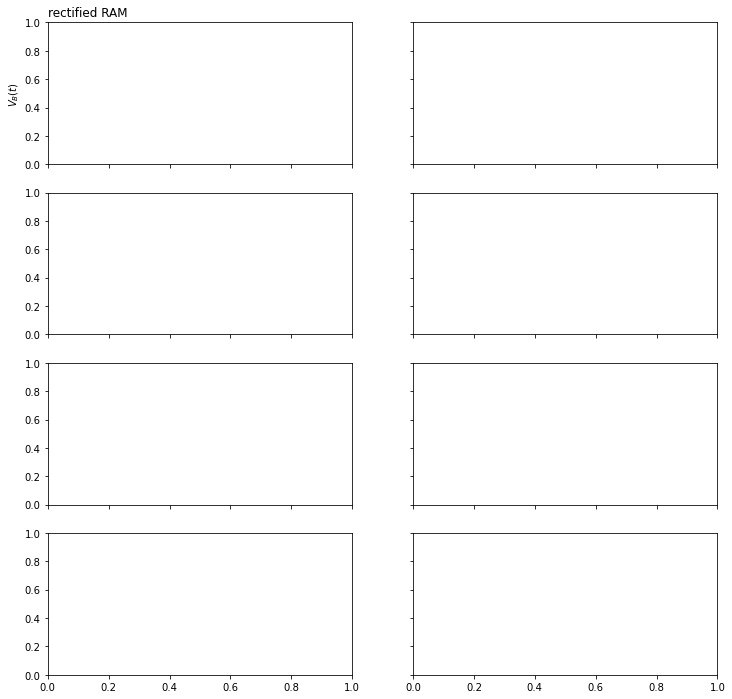

In [24]:
lw = 4
c1 = 'pink'
c2 = 'green'


fig,ax = plt.subplots(4,2,  figsize = (12,12), sharex = 'col', sharey = 'row')

ax[0,0].set_title('rectified RAM', loc = 'left')


ax[0,0].set_ylabel('$V_{B}(t)$')
ax[0,0].plot(data4[1][0],outdp8['VB'][50,:], color = 'lightgrey', linewidth = lw)
ax[0,0].plot(data4[1][0],outd8['VB'][50,:], color = c1, linewidth = lw)

ax[1,0].set_ylabel('$R_{B}(t)$')
ax[1,0].plot(data4[1][0],outdp8['RB'][50,:], color = 'lightgrey', linewidth = lw)
ax[1,0].plot(data4[1][0], outd8['RB'][50,:], color = c1, linewidth = lw)

#ax[2,0].plot(data[1][0],outd['RB'][300,:]- outdp['RB'][300,:], color = 'green', linestyle = ':')

ax[2,0].set_ylabel('$V_{G}(t)$')
ax[2,0].plot(data4[1][0],outdp8['VG'][:], color = 'grey')
ax[2,0].plot(data4[1][0], outd8['VG'][:], color = c1, linewidth = lw)

ax[3,0].set_ylabel('$R_{G}(t)$')
ax[3,0].plot(data4[1][0],outdp8['RG'][:], color = 'grey')
ax[3,0].plot(data4[1][0], outd8['RG'][:], color = c1, linewidth = lw)



ax[0,1].set_title(' linear RAM', loc = 'left')

ax[0,1].set_ylabel('$V_{B}(t)$')
ax[0,1].plot(data4[1][0],outdp7['VB'][50,:], color = 'lightgrey', linewidth = lw)
ax[0,1].plot(data4[1][0],outd7['VB'][50,:], color = c2, linewidth = lw)

ax[1,1].set_ylabel('$R_{B}(t)$')
ax[1,1].plot(data4[1][0],outdp7['RB'][50,:], color = 'lightgrey', linewidth = lw)
ax[1,1].plot(data4[1][0], outd7['RB'][50,:], color = c2, linewidth = lw)

#ax[2,1].plot(data[1][0],outd3['RB'][300,:]- outdp3['RB'][300,:], color = 'cyan', linestyle = ':')

ax[2,1].set_ylabel('$V_{G}(t)$')
ax[2,1].plot(data4[1][0],outdp7['VG'][:], color = 'lightgrey', linewidth = lw)
ax[2,1].plot(data4[1][0],outd7['VG'][:], color = c2, linewidth = lw)

ax[3,1].set_ylabel('$R_{G}(t)$')
ax[3,1].plot(data4[1][0],outdp7['RG'][:], color = 'lightgrey', linewidth = lw)
ax[3,1].plot(data4[1][0], outd7['RG'][:], color = c2, linewidth = lw)


ax[0,1].axvline(0,linestyle = ':', color = 'k', linewidth =2 )
ax[1,1].axvline(0,linestyle = ':', color = 'k', linewidth =2 )
ax[2,1].axvline(0,linestyle = ':', color = 'k', linewidth =2 )
ax[3,1].axvline(0,linestyle = ':', color = 'k', linewidth =2 )


ax[0,0].axvline(0,linestyle = ':', color = 'k', linewidth =2 )
ax[1,0].axvline(0,linestyle = ':', color = 'k', linewidth =2 )
ax[2,0].axvline(0,linestyle = ':', color = 'k', linewidth =2 )
ax[3,0].axvline(0,linestyle = ':', color = 'k', linewidth =2 )


ax[-1,0].set_xlabel ('time [s]')
ax[-1,1].set_xlabel ('time [s]')
ax[-1,0].set_xlim(-500,500)
ax[-1,1].set_xlim(-500,500)


ax[-1,0].set_xlabel ('time [s]')
ax[-1,1].set_xlabel ('time [s]')
ax[-1,0].set_xlim(-500,500)
ax[-1,1].set_xlim(-500,500)


In [ ]:
speeds

[0.27, 0.81, 1.62, 3.24, 0.1, 0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

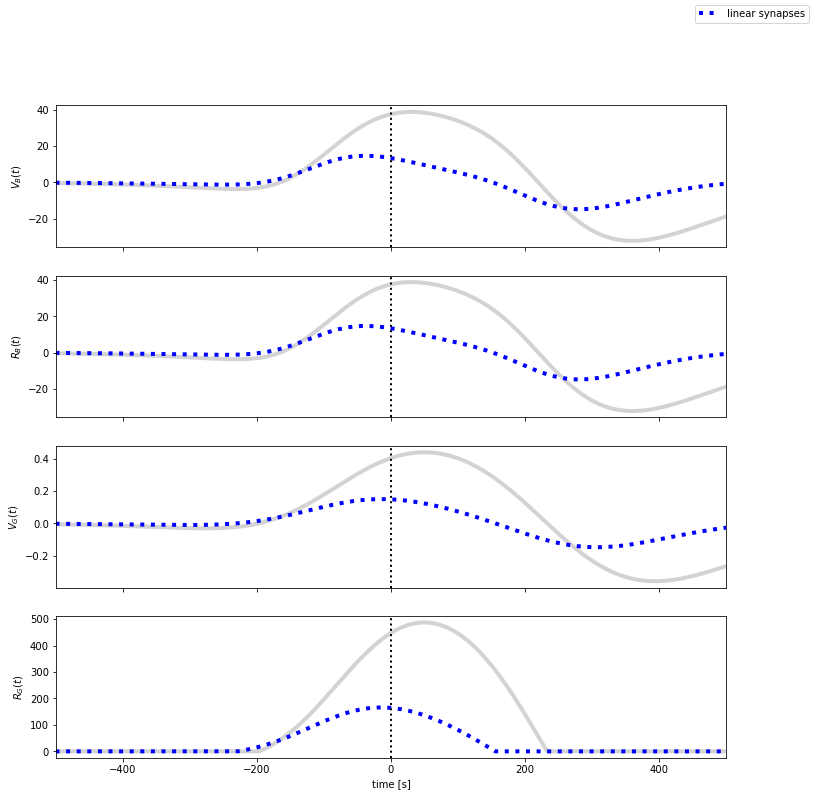

In [27]:
lw = 4
c1 = 'green'
c2 = 'blue'


fig,ax = plt.subplots(4,1,  figsize = (12,12), sharex = 'col', sharey = 'row')






ax[0].plot(data4[-1][0],outdp7['VB'][50,:], color = 'lightgrey', linewidth = lw)
ax[0].plot(data4[-1][0],outd7['VB'][50,:], color = c2, linewidth = lw, linestyle = ':', label = 'linear synapses')

ax[1].plot(data4[-1][0],outdp7['RB'][50,:], color = 'lightgrey', linewidth = lw)
ax[1].plot(data4[-1][0], outd7['RB'][50,:], color = c2, linewidth = lw, linestyle = ':')


ax[2].plot(data4[-1][0],outdp7['VG'][:], color = 'lightgrey', linewidth = lw)
ax[2].plot(data4[-1][0],outd7['VG'][:], color = c2, linewidth = lw, linestyle = ':')

ax[3].plot(data4[-1][0],outdp7['RG'][:], color = 'lightgrey', linewidth = lw)
ax[3].plot(data4[-1][0], outd7['RG'][:], color = c2, linewidth = lw, linestyle = ':')




ax[0].set_ylabel('$V_{B}(t)$')
#ax[0].plot(data4[1][0],outdp8['VB'][50,:], color = 'lightgrey', linewidth = lw)
#ax[0].plot(data4[1][0],outd8['VB'][50,:], color = c1, linewidth = lw, label = 'rectified synapses')

ax[1].set_ylabel('$R_{B}(t)$')
#ax[1].plot(data4[1][0],outdp8['RB'][50,:], color = 'lightgrey', linewidth = lw)
#ax[1].plot(data4[1][0], outd8['RB'][50,:], color = c1, linewidth = lw)

#ax[2,0].plot(data[1][0],outd['RB'][300,:]- outdp['RB'][300,:], color = 'green', linestyle = ':')

ax[2].set_ylabel('$V_{G}(t)$')
#ax[2].plot(data4[1][0],outdp8['VG'][:], color = 'grey')
#ax[2].plot(data4[1][0], outd8['VG'][:], color = c1, linewidth = lw)

ax[3].set_ylabel('$R_{G}(t)$')
#ax[3].plot(data4[1][0],outdp8['RG'][:], color = 'grey')
#ax[3].plot(data4[1][0], outd8['RG'][:], color = c1, linewidth = lw)



ax[0].axvline(0,linestyle = ':', color = 'grey', linewidth =2 )
ax[1].axvline(0,linestyle = ':', color = 'grey', linewidth =2 )
ax[2].axvline(0,linestyle = ':', color = 'grey', linewidth =2 )
ax[3].axvline(0,linestyle = ':', color = 'grey', linewidth =2 )


ax[-1].set_xlabel ('time [s]')
ax[-1].set_xlim(-500,500)

fig.legend()



# Oscillations

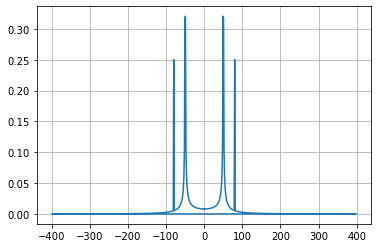

In [32]:
from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt

# Number of sample points
N = 600

# sample spacing
T = 1.0 / 800.0

x = np.linspace(0.0, N*T, N, endpoint=False)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)

yf = fft(y)

xf = fftfreq(N, T)

plt.plot(xf, 1.0/N * np.abs(yf))

plt.grid()

plt.show()

/user/sebert/home/miniconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


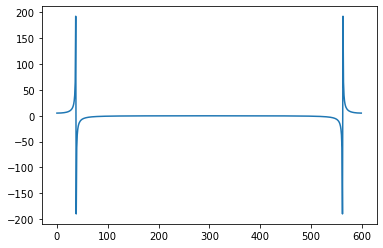

In [31]:
plt.plot(yf)

# TRASH

IndexError: index 300 is out of bounds for axis 0 with size 100

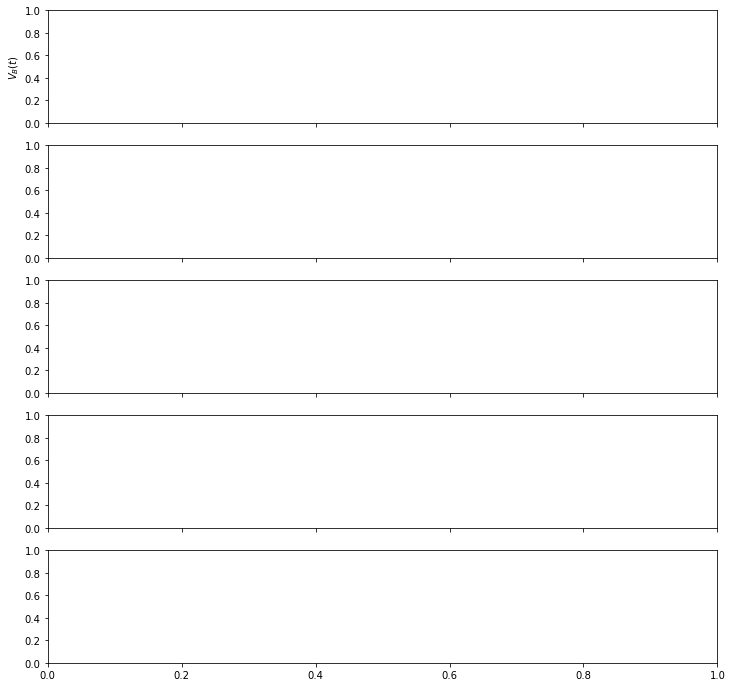

In [12]:
fig,ax = plt.subplots(5,1,  figsize = (12,12), sharex = 'col', sharey = 'row')


#ax[0,1].set_title('RAM', loc = 'left')

ax[0].set_ylabel('$V_{B}(t)$')
ax[0].plot(data[1][0],outdp3['VB'][300,:], color = 'lightgrey', linewidth = lw)
ax[0].plot(data[1][0],outd3['VB'][300,:], color = c2, linewidth = lw)

ax[1].set_ylabel('$R_{B}(t)$')
ax[1].plot(data[1][0],outdp3['RB'][300,:], color = 'lightgrey', linewidth = lw)
ax[1].plot(data[1][0], outd3['RB'][300,:], color = c2, linewidth = lw)


ax[2].set_ylabel('$V_{A}(t)$')
ax[2].plot(data[1][0],outd3['VA'][300,:], color = c2, linewidth = lw)

ax[3].set_ylabel('$V_{G}(t)$')
#ax[2,1].plot(data[1][0],outdp3['VG'][300,:], color = 'grey')
ax[3].plot(data[1][0],outd3['VG'][300,:], color = c2, linewidth = lw)

ax[4].set_ylabel('$R_{G}(t)$')
#ax[3,1].plot(data[1][0],outdp3['RG'][300,:], color = 'grey')
ax[4].plot(data[1][0], outd3['RG'][300,:], color = c2, linewidth = lw)


ax[0].axvline(0,linestyle = ':', color = 'k', linewidth =2 )
ax[1].axvline(0,linestyle = ':', color = 'k', linewidth =2 )
ax[2].axvline(0,linestyle = ':', color = 'k', linewidth =2 )
ax[3].axvline(0,linestyle = ':', color = 'k', linewidth =2 )
ax[4].axvline(0,linestyle = ':', color = 'k', linewidth =2 )


ax[0].axvline(0,linestyle = ':', color = 'k', linewidth =2 )
ax[1].axvline(0,linestyle = ':', color = 'k', linewidth =2 )
ax[2].axvline(0,linestyle = ':', color = 'k', linewidth =2 )
ax[3].axvline(0,linestyle = ':', color = 'k', linewidth =2 )
ax[4].axvline(0,linestyle = ':', color = 'k', linewidth =2 )


ax[-1].set_xlabel ('time [s]')
ax[-1].set_xlabel ('time [s]')
ax[-1].set_xlim(-500,500)
ax[-1].set_xlim(-500,500)

-0.048538812638559393
0.9978925224399


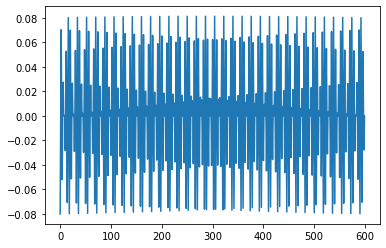

In [ ]:
# look at eigenvectors of the system

plt.plot(paramsi['P'][:600,50])
print(np.sum(paramsi['P'][:600,50]))
print(np.sum(np.linalg.norm(paramsi['P'][:600,50])))


In [ ]:
# convolve input with eigenvalues
paramsi['lam']
P = paramsi['P']

def biphasic_alpha(t,tauOPL,tauOPL2,SF):
    kern =  (t/tauOPL**2) * np.exp(-t/tauOPL) * np.heaviside(t,1) -  SF* (t/tauOPL2**2) * np.exp(-t/tauOPL2) * np.heaviside(t,1) 
    # kern = (t/tauOPL) * np.exp(-t/tauOPL) * np.heaviside(t,1) -  SF* (t/tauOPL2) * np.exp(-t/tauOPL2) * np.heaviside(t,1) 
    # kern = kern/(np.sum(kern)*0.001)
    #calculate integral
    return  kern


ftime = np.arange(0,1,dt)
resV = np.zeros((1200,1200,len(outd3['inp'][0,:])))
resP = np.zeros(resV.shape)
res = np.zeros(resV.shape)

beta = 0

for x,beta in enumerate(range(0,1200,10)):
    #print(beta)
    sw =1/paramsi['tauB'] + paramsi['lam'][beta]

    for i in range(600):
        temporal_kernel = biphasic_alpha(ftime,paramsi['lam'][beta],1,0) 
        signa = outd3['F'][i,:]
        res[x,i,:] = convolve(signa,temporal_kernel, mode = 'full')[:-len(temporal_kernel)+1]

    # project into eigenspace basis
        resP[x,i,:] = sw * (P.T[beta,i]*res[x,i,:])


# project pack into voltage basis
    resV[x,:,:]= resV[x-1,:,:] + P[100,beta]*resP[x,:,:]

#sum over i 
Vti = np.sum(resV, axis = 1)
print(Vti.shape) # should be 120,T
Vt = np.sum(np.sum(resV, axis = 1),axis = 0)
print(Vt.shape) # should be 1, T


(1200, 3704)
(3704,)


In [ ]:
#sum over i 
Vti = np.sum(resV, axis = 0)
print(Vti.shape) # should be 120,T
Vt = np.sum(Vti, axis = 0)
print(Vt.shape) # should be 1, T


(1200, 3704)
(3704,)


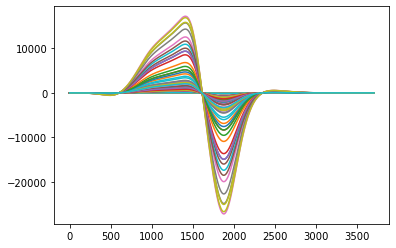

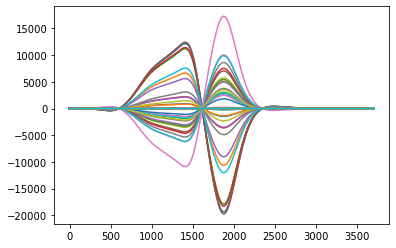

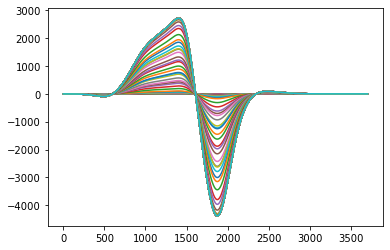

In [ ]:
plt.figure()
for i in range(120):
    plt.plot(res[i,100,:])

plt.figure()
for i in range(120):
    plt.plot(resP[i,100,:])


plt.figure()
for i in range(120):
    plt.plot(resV[i,100,:])


In [ ]:
len(resV)

1200

(array([286., 150., 164.,   0.,   0.,   0.,   0., 164., 150., 286.]),
 array([-124.99984286, -113.14089993, -101.281957  ,  -89.42301407,
         -77.56407114,  -65.70512821,  -53.84618527,  -41.98724234,
         -30.12829941,  -18.26935648,   -6.41041355]),
 <BarContainer object of 10 artists>)

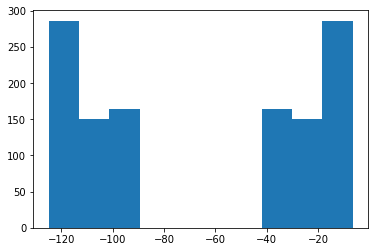

In [ ]:
plt.hist(paramsi['lam'])

/tmp/ipykernel_92780/1576194581.py:5: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(resP[119,100,:]/np.max(resP[119,100,:]))


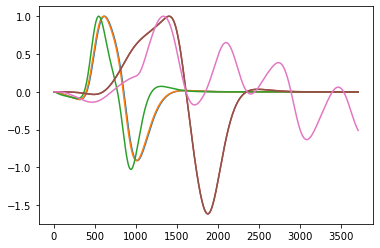

In [ ]:

plt.plot(outd3['inp'][100,:]/np.max(outd3['inp'][100,:]))
plt.plot(outd3['F'][100,:]/np.max(outd3['F'][100,:]))
plt.plot(outd3['VB'][100,:]/np.max(outd3['VB'][100,:]))
plt.plot(res[119,100,:]/np.max(res[119,100,:]))
plt.plot(resP[119,100,:]/np.max(resP[119,100,:]))
plt.plot(resV[119,100,:]/np.max(resV[119,100,:]))
plt.plot(Vt/np.max(Vt))

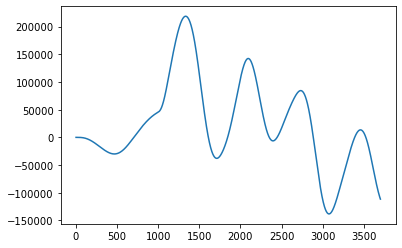

In [ ]:
plt.plot(Vt)

In [ ]:
# plot contribution for each eigenmode 
paramsi['speed']

1.0

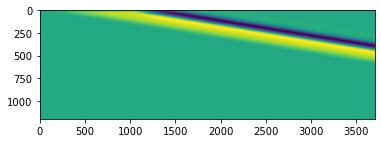

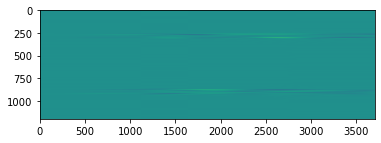

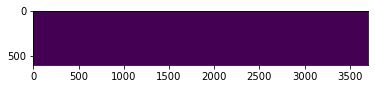

In [ ]:
plt.figure()
plt.imshow(res)
plt.figure()
plt.imshow(resP)
plt.figure()
plt.imshow(resV)
